# Final Project Phase II 

### Sources
- https://stackoverflow.com/questions/72925436/how-to-merge-multiple-6-dataframes-together-based-on-one-common-column-in-pyth


## Research Question:

Can we use different socio-economic factors like the Human Development Index, Life Expectancy, GDP, Unemployment Rate, and Urbanization Rate to predict Mental Health Rate in different countries in the future?

### Import Packages

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
from functools import reduce


# Datasets

## 1. Global Mental Health Disorders

### Data Description:

- This is a pretty dense dataset that contains information aboout the prevalence of mental health disorders in multiple countries. Each row has information about a certain country or region for a certain year. The columns include Entity (the country or region name), Code(the code for the country or region), Year, as well as the percentage of people with specific disorders as 'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)','Drug use disorders (%)', 'Depression (%)', and 'Alcohol use disorders (%)'. 

- The dataset was obtained from Kaggle.com and was compiled by a person that goes by the pseudonym "Amit". It was created for the purpose of understanding whether or not the prevalence rates across different types of mental illnesses increase or decrease over time. Overall, the dataset allws for a deeper understanding of different mental health conditions and their implications when it comes to impacting lives. 

- Source:
https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder


### Data Cleaning
The first step we took was create a function that takes a dataframe, checks if it has any missing or NaN values, drops those NaN values, and then return a cleaned up dataframe. We reused this function throughout the data cleaning step of all our datasets


In [57]:
#Create a function that checks for any NaN values and then drops them. 
def checkNans(df):
    nan_vals_exist = df.isna().any().any()

    if nan_vals_exist:
        print("There are NaN values in the dataset.")
        df = df.dropna()
        return checkNans(df)
    else:
        print("No NaN values in the dataset.")
        return df

We started with out first dataset which we named global_mental_health_df.

In [58]:
##Read Global Mental Health Dataset
global_mental_health_df = pd.read_csv('Mental health Depression disorder Data 2.csv')
print(global_mental_health_df.head())

   index       Entity Code  Year Schizophrenia (%) Bipolar disorder (%)  \
0      0  Afghanistan  AFG  1990           0.16056             0.697779   
1      1  Afghanistan  AFG  1991          0.160312             0.697961   
2      2  Afghanistan  AFG  1992          0.160135             0.698107   
3      3  Afghanistan  AFG  1993          0.160037             0.698257   
4      4  Afghanistan  AFG  1994          0.160022             0.698469   

  Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0             0.101855               4.828830                1.677082   
1             0.099313               4.829740                1.684746   
2             0.096692               4.831108                1.694334   
3             0.094336               4.830864                1.705320   
4             0.092439               4.829423                1.716069   

   Depression (%)  Alcohol use disorders (%)  
0        4.071831                   0.672404  
1        4.07953

/var/folders/7x/2j_pjlnj2v32g7jvxdd86np80000gn/T/ipykernel_81738/89887274.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  global_mental_health_df = pd.read_csv('Mental health Depression disorder Data 2.csv')


The original dataset introduces new columns such as "Prevalence in Males" and "Prevalence in Females" starting from row 6468.  These additional columns only included values for very few countries, which we eliminated since it would have given us an uneven dataset. So we decided to drop the rows after the last instance of the last country. Additionally, some of the values in the Year column were string instances that had to be converted to numbers. We also decided to drop some irrelevant columns like index and code. The original dataset contained NaNs and years going back to 9000 BCE for some regions. We dropped the NaN values and limited the dataset to years between 2000 and 2015 as that was the range of years that were in common across our datasets.

In [59]:
#drop all rows after Prevalence in males & females
global_mental_health_df = global_mental_health_df.iloc[:6468]

#convert year to numeric and limit dataset to between years 1990-2017
global_mental_health_df['Year'] = pd.to_numeric(global_mental_health_df['Year'])
global_mental_health_df = global_mental_health_df[(global_mental_health_df['Year'] >= 2000) & (global_mental_health_df['Year'] <= 2015)]

#drop code column
global_mental_health_df = global_mental_health_df.drop(labels = ['index', 'Code'], axis = 1)

#Rename Entity column to Country
global_mental_health_df= global_mental_health_df.rename(columns={'Entity': 'Country'})

#drop rows with NaNs
global_mental_health_df = checkNans(global_mental_health_df)

print(global_mental_health_df.head())
print(global_mental_health_df.shape)

No NaN values in the dataset.
        Country  Year Schizophrenia (%) Bipolar disorder (%)  \
10  Afghanistan  2000          0.161621             0.700015   
11  Afghanistan  2001          0.161957             0.700499   
12  Afghanistan  2002          0.162414             0.701141   
13  Afghanistan  2003          0.162916              0.70186   
14  Afghanistan  2004          0.163377             0.702556   

   Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
10             0.086021               4.827047                1.788395   
11             0.086517               4.831409                1.839123   
12             0.087023               4.838318                1.934326   
13             0.087189               4.845538                2.051106   
14             0.088158               4.851512                2.163044   

    Depression (%)  Alcohol use disorders (%)  
10        4.118610                   0.662479  
11        4.121381                   0.66115

## 2. Life Expectancy 

### Data Description:

- The dataset contains information about different factors related to life expectancy. The health factors for 193 countries were collected from the WHO data repository website and its corresponding economic data was collected from United Nation website. 
- This information was then filtered out and compiled by Kumarra Jarshi to include critical factors that are more representative. He created the Life expectancy dataset for the purpose of putting into account the immunization and human development rates in relation to life expectancy considering demographic variables, income composition and mortality rates by formulating a regression model with data from a period of 2000 to 2015 for all the countries. 

- The dataset includes columns like 'Country', 'Year', 'Status', 'Life expectancy 'as well as many additional health status variables like 'Polio','under-five deaths ', and ' HIV/AIDS'.

- Source:
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [60]:
#Load the life expectancy data
life_df = pd.read_csv('1Life Expectancy Data, GPD, Popn.csv')
print(life_df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

### Data Cleaning:
Since we were only interested in the life expectancy data from this dataset, we subsetted the the columns including country, year, and life expectancy. Afterwards, we applied our checkNans function to check for any NAN values and removed the corresponding rows from the dataset.

In [61]:
# #Data Cleaning
columns_to_keep=['Country', 'Year', 'Life expectancy ']

# Subset the DataFrame to include the country, year, life expectancy, population, and GDP
life_df = life_df[columns_to_keep]

# Display the subset DataFrame
print(life_df.head())
print(life_df.shape)

       Country  Year  Life expectancy 
0  Afghanistan  2015              65.0
1  Afghanistan  2014              59.9
2  Afghanistan  2013              59.9
3  Afghanistan  2012              59.5
4  Afghanistan  2011              59.2
(2938, 3)


In [62]:
# Check for NaN values
checkNans(life_df)
print(life_df.head())
print(life_df.shape)

There are NaN values in the dataset.
No NaN values in the dataset.
       Country  Year  Life expectancy 
0  Afghanistan  2015              65.0
1  Afghanistan  2014              59.9
2  Afghanistan  2013              59.9
3  Afghanistan  2012              59.5
4  Afghanistan  2011              59.2
(2938, 3)


## 3. GDP

### Data Description:

- The dataset contains information about the Gross Domestic Product(GDP) of countries from years 1970-2021. The columns include Country, Year, Unit, and GDP in US Dollars.

- This dataset was collected from The National Accounts Main Aggregates Database, which presents a series of analytical national accounts tables from 1970 onwards for more than 200 countries and areas of the world. It is the product of a global cooperation effort between the Economic Statistics Branch of the United Nations Statistics Division, international statistical agencies and the national statistical services of these countries. The database is updated in December of each year with newly available national accounts data for all countries and areas.

- Source:
https://unstats.un.org/unsd/snaama/Basic
 

In [63]:
#Import GDP data
gdp_df = pd.read_csv('gdp.csv')
print(gdp_df.head())

  Country/Area  Year Unit GDP, at current prices - US Dollars
0  Afghanistan  1970  US$                  1731435586.8842428
1  Afghanistan  1971  US$                  1812837521.0783834
2  Afghanistan  1972  US$                  1647900178.1171024
3  Afghanistan  1973  US$                  1702716294.1475306
4  Afghanistan  1974  US$                  2061729287.4529502


### Data Cleaning:

We removed unnecessary columns such as the "Unit" and subsetted the dataset so only Country/Area, Year, and GDP columns were kept. We renamed the Country/Area to Country for consistency across datasets. Furthermore, we filtered the dataset to contain only the years between 2000 and 2015. Afterwards, we applied our checkNans function to check for any NAN values and removed the corresponding rows from the dataset.  

In [64]:
##Data Cleaning

# List of years from 2000 to 2015
columns_to_keep=['Country/Area', 'Year', 'GDP, at current prices - US Dollars']

# Subset the DataFrame to include the country, year, life expectancy, population, and GDP
gdp_df = gdp_df[columns_to_keep]
gdp_df = gdp_df[(gdp_df['Year'] >= 2000) & (gdp_df['Year'] <= 2015)]

#Rename Country/Area column to Country
gdp_df= gdp_df.rename(columns={'Country/Area': 'Country'})

# Display the subset DataFrame
print(gdp_df.head())
print(gdp_df.shape)

        Country  Year GDP, at current prices - US Dollars
30  Afghanistan  2000                  3342034168.1008005
31  Afghanistan  2001                   3598470575.623935
32  Afghanistan  2002                   4141523942.745911
33  Afghanistan  2003                   4729042179.168847
34  Afghanistan  2004                   5388482107.458281
(4000, 3)


In [65]:
# Check for NaN values
gdp_df = checkNans(gdp_df)
print(gdp_df.head())
print(gdp_df.shape)

No NaN values in the dataset.
        Country  Year GDP, at current prices - US Dollars
30  Afghanistan  2000                  3342034168.1008005
31  Afghanistan  2001                   3598470575.623935
32  Afghanistan  2002                   4141523942.745911
33  Afghanistan  2003                   4729042179.168847
34  Afghanistan  2004                   5388482107.458281
(4000, 3)


## 4. HDI

### Data Description:

- The Human Development Index(HDI) dataset was obtained from Human Development Reports by the United Nations Development Programme and it was created for the purpose of providing high quality international statistics that are free and accessible for all. It contains information on the Human Development Index for multiple countries from 1990-2021. The HDI is calculated by taking into account the Life Expectancy, Education, and Per-Capita Income of countries.

- Source:
https://hdr.undp.org/data-center/documentation-and-downloads


In [66]:
#Import HDI data
hdi_df = pd.read_csv('1HDI rates.csv')
print(hdi_df.head())


  iso3               country    hdicode region  hdi_rank_2021  hdi_1990  \
0  AFG           Afghanistan        Low     SA          180.0     0.273   
1  AGO                Angola     Medium    SSA          148.0       NaN   
2  ALB               Albania       High    ECA           67.0     0.647   
3  AND               Andorra  Very High    NaN           40.0       NaN   
4  ARE  United Arab Emirates  Very High     AS           26.0     0.728   

   hdi_1991  hdi_1992  hdi_1993  hdi_1994  ...  hdi_2012  hdi_2013  hdi_2014  \
0     0.279     0.287     0.297     0.292  ...     0.466     0.474     0.479   
1       NaN       NaN       NaN       NaN  ...     0.541     0.552     0.563   
2     0.629     0.614     0.617     0.624  ...     0.778     0.785     0.792   
3       NaN       NaN       NaN       NaN  ...     0.869     0.864     0.871   
4     0.739     0.742     0.748     0.755  ...     0.846     0.852     0.859   

   hdi_2015  hdi_2016  hdi_2017  hdi_2018  hdi_2019  hdi_2020  hdi_2

### Data Cleaning:

We started by manually deleting multiple columns on excel that included metrics that were used in calculating the HDI. We then dropped the hdi_rank_2021 column and then renamed all the column names to get just the years. We then subsetted the dataset so only Country, Year, and columns with years were kept. We capilalized the country column for consistency across datasets. Furthermore, we filtered the dataset to contain only the years between 2000 and 2015. Afterwards, we applied our checkNans function to check for any NAN values and removed the corresponding rows from the dataset.  

In [67]:
#renaming column names
hdi_df = hdi_df.drop('hdi_rank_2021', axis=1)
for column in hdi_df.columns:
    if column.startswith("hdi_"):
        new_column_name = column[4:]
        hdi_df.rename(columns={column: new_column_name}, inplace=True)
print(hdi_df.head())

  iso3               country    hdicode region   1990   1991   1992   1993  \
0  AFG           Afghanistan        Low     SA  0.273  0.279  0.287  0.297   
1  AGO                Angola     Medium    SSA    NaN    NaN    NaN    NaN   
2  ALB               Albania       High    ECA  0.647  0.629  0.614  0.617   
3  AND               Andorra  Very High    NaN    NaN    NaN    NaN    NaN   
4  ARE  United Arab Emirates  Very High     AS  0.728  0.739  0.742  0.748   

    1994   1995  ...   2012   2013   2014   2015   2016   2017   2018   2019  \
0  0.292  0.310  ...  0.466  0.474  0.479  0.478  0.481  0.482  0.483  0.488   
1    NaN    NaN  ...  0.541  0.552  0.563  0.582  0.596  0.597  0.595  0.595   
2  0.624  0.634  ...  0.778  0.785  0.792  0.795  0.798  0.802  0.806  0.810   
3    NaN    NaN  ...  0.869  0.864  0.871  0.867  0.871  0.868  0.872  0.873   
4  0.755  0.762  ...  0.846  0.852  0.859  0.865  0.870  0.897  0.909  0.920   

    2020   2021  
0  0.483  0.478  
1  0.590  0.58

In [68]:
# List of years from 2000 to 2015
years_subset = [str(year) for year in range(2000, 2016)]

# Subset the DataFrame to include both the country name and the required columns
hdi_df_subset = hdi_df[['country'] + years_subset]

#Rename country column to Country
hdi_df_subset= hdi_df_subset.rename(columns={'country': 'Country'})

# Display the subset DataFrame
print(hdi_df_subset.head())

                Country   2000   2001   2002   2003   2004   2005   2006  \
0           Afghanistan  0.335  0.337  0.362  0.376  0.392  0.400  0.409   
1                Angola  0.375  0.386  0.403  0.420  0.433  0.447  0.459   
2               Albania  0.677  0.684  0.689  0.696  0.700  0.711  0.718   
3               Andorra  0.818  0.825  0.832  0.841  0.833  0.833  0.848   
4  United Arab Emirates  0.796  0.800  0.804  0.814  0.818  0.822  0.827   

    2007   2008   2009   2010   2011   2012   2013   2014   2015  
0  0.424  0.430  0.440  0.448  0.456  0.466  0.474  0.479  0.478  
1  0.475  0.486  0.500  0.510  0.526  0.541  0.552  0.563  0.582  
2  0.730  0.736  0.741  0.754  0.766  0.778  0.785  0.792  0.795  
3  0.847  0.850  0.848  0.848  0.849  0.869  0.864  0.871  0.867  
4  0.831  0.834  0.833  0.835  0.840  0.846  0.852  0.859  0.865  


In [69]:
# Check for NaN values
checkNans(hdi_df_subset)
print(hdi_df_subset.head())

There are NaN values in the dataset.
No NaN values in the dataset.
                Country   2000   2001   2002   2003   2004   2005   2006  \
0           Afghanistan  0.335  0.337  0.362  0.376  0.392  0.400  0.409   
1                Angola  0.375  0.386  0.403  0.420  0.433  0.447  0.459   
2               Albania  0.677  0.684  0.689  0.696  0.700  0.711  0.718   
3               Andorra  0.818  0.825  0.832  0.841  0.833  0.833  0.848   
4  United Arab Emirates  0.796  0.800  0.804  0.814  0.818  0.822  0.827   

    2007   2008   2009   2010   2011   2012   2013   2014   2015  
0  0.424  0.430  0.440  0.448  0.456  0.466  0.474  0.479  0.478  
1  0.475  0.486  0.500  0.510  0.526  0.541  0.552  0.563  0.582  
2  0.730  0.736  0.741  0.754  0.766  0.778  0.785  0.792  0.795  
3  0.847  0.850  0.848  0.848  0.849  0.869  0.864  0.871  0.867  
4  0.831  0.834  0.833  0.835  0.840  0.846  0.852  0.859  0.865  


The resulting dataframe is wide so we converted it to a long dataframe by melting it.

In [70]:
#Melting Dataframe
hdi_df_subset = pd.melt(hdi_df_subset, id_vars=['Country'],
                        value_vars=[ '2000', '2001', '2002', '2003', '2004','2005','2006', '2007', '2008', '2009', '2010','2011','2012', '2013', '2014','2015'],
                        var_name='Year', value_name='HDI')
print(hdi_df_subset.head())

                Country  Year    HDI
0           Afghanistan  2000  0.335
1                Angola  2000  0.375
2               Albania  2000  0.677
3               Andorra  2000  0.818
4  United Arab Emirates  2000  0.796


## 5. Urbanization Rate

### Data Description

- This is a pretty dense dataset that contains information about the prevalence of Urbanization Rate in multiple countries. Each row has information about a certain country or region for a certain year. The columns include Country Name, Country Code(the code for the country or region and Year, Indicator Name (code of indicator used in World Bank data), Indicator Code, and Year.
- The dataset was obtained from Kaggle.com and was compiled by a person named "HANNA YUKHYMENKO". It was created for the purpose of understanding the occurrence of urban populations across different countries over time. Overall, the dataset allows for a deeper understanding of Urbanization rates in a country and their implications when it comes to impacting lives.
- Link to Dataset: https://www.kaggle.com/datasets/equinxx/urban-population-19602021-by-country

We added another dataset which we named urban_df.

In [71]:
#Import Urbanization Rate data
urban_df = pd.read_csv('1urban_percent.csv')
print(urban_df.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                             Indicator Name     Indicator Code       1960  \
0  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  50.776000   
1  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.704688   
2  Urban population (% of total population)  SP.URB.TOTL.IN.ZS   8.401000   
3  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.670329   
4  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  10.435000   

        1961       1962       1963       1964       1965  ...       2012  \
0  50.761000  50.746000  50.730000  50.715000  50.700000  ...  42.957000   
1  14.944459  15.185608  15.444414  15.719076  16.001992  ...  33.071687   
2   8.684000   8.976000   

Some of the values in the Year column were string instances that had to be converted to numbers. We also decided to drop some irrelevant columns like Country Code, Indicator Name, and "Indicator Code". The original dataset contained NaNs so  we  removed rows that contained these NAN values.  We renamed the Country Name to "Country" to make it alike with the other final datasets. We limited the dataset to years between 2000 and 2015 as that was the range of years that were in common across our datasets. Lastly, we melted our dataset so that the Country, Year and Urbanization Rate would appear as columns. 

In [72]:
# #Data Cleaning

# List of years from 2000 to 2015
years_subset = [str(year) for year in range(2000, 2016)]

# Subset the DataFrame to include both the country name and the required columns
urban_df_subset = urban_df[['Country Name'] + years_subset]

#Rename Country Name column to Country
urban_df_subset= urban_df_subset.rename(columns={'Country Name': 'Country'})

# Display the subset DataFrame
print(urban_df_subset.head())

                       Country       2000       2001       2002       2003  \
0                        Aruba  46.717000  46.339000  45.972000  45.606000   
1  Africa Eastern and Southern  28.669286  28.977074  29.304199  29.631273   
2                  Afghanistan  22.078000  22.169000  22.261000  22.353000   
3   Africa Western and Central  35.352981  35.953248  36.557977  37.174436   
4                       Angola  50.087000  51.274000  52.461000  53.645000   

        2004       2005       2006       2007       2008       2009  \
0  45.240000  44.875000  44.511000  44.147000  43.783000  43.421000   
1  29.961824  30.309705  30.646243  30.914094  31.331321  31.756471   
2  22.500000  22.703000  22.907000  23.113000  23.320000  23.528000   
3  37.799819  38.431392  39.070790  39.708825  40.345960  40.984317   
4  54.827000  56.000000  56.764000  57.524000  58.282000  59.034000   

        2010       2011       2012       2013       2014       2015  
0  43.059000  42.940000  42.957000

In [73]:
# Check for NaN values
checkNans(urban_df_subset)
print(urban_df_subset.head())

There are NaN values in the dataset.
No NaN values in the dataset.
                       Country       2000       2001       2002       2003  \
0                        Aruba  46.717000  46.339000  45.972000  45.606000   
1  Africa Eastern and Southern  28.669286  28.977074  29.304199  29.631273   
2                  Afghanistan  22.078000  22.169000  22.261000  22.353000   
3   Africa Western and Central  35.352981  35.953248  36.557977  37.174436   
4                       Angola  50.087000  51.274000  52.461000  53.645000   

        2004       2005       2006       2007       2008       2009  \
0  45.240000  44.875000  44.511000  44.147000  43.783000  43.421000   
1  29.961824  30.309705  30.646243  30.914094  31.331321  31.756471   
2  22.500000  22.703000  22.907000  23.113000  23.320000  23.528000   
3  37.799819  38.431392  39.070790  39.708825  40.345960  40.984317   
4  54.827000  56.000000  56.764000  57.524000  58.282000  59.034000   

        2010       2011       2012   

In [74]:
#Melting Dataframe
urban_df_subset = pd.melt(urban_df_subset, id_vars=['Country'],
                        value_vars=[ '2000', '2001', '2002', '2003', '2004','2005','2006', '2007', '2008', '2009', '2010','2011','2012', '2013', '2014','2015'],
                        var_name='Year', value_name='Urbanization Rate')
print(urban_df_subset.head())

                       Country  Year  Urbanization Rate
0                        Aruba  2000          46.717000
1  Africa Eastern and Southern  2000          28.669286
2                  Afghanistan  2000          22.078000
3   Africa Western and Central  2000          35.352981
4                       Angola  2000          50.087000


## 6. Unemployment Rate

### Data Description:

- This is a pretty dense dataset that contains information about the prevalence of Unemployment Rate in multiple countries. Each row has information about a certain country or region for a certain year. The columns include Country Name, Country Code(the code for the country or region)and Year.
- The dataset was obtained from Kaggle.com and was compiled by a person named "Anjali pant". It was created for the purpose of understanding the occurance of unemployment rates across different countries over time. Overall, the dataset allows for a deeper understanding of the health of the economy in a country and their implications when it comes to impacting lives.
- Link to Dataset: https://www.kaggle.com/datasets/pantanjali/unemployment-dataset

We added another dataset which we named unemploy_df.

In [75]:
#Import Unemployment Rate data
unemploy_df = pd.read_csv('1unemployment analysis.csv')
print(unemploy_df.head())

                  Country Name Country Code   1991   1992   1993   1994  \
0  Africa Eastern and Southern          AFE   7.80   7.84   7.85   7.84   
1                  Afghanistan          AFG  10.65  10.82  10.72  10.73   
2   Africa Western and Central          AFW   4.42   4.53   4.55   4.54   
3                       Angola          AGO   4.21   4.21   4.23   4.16   
4                      Albania          ALB  10.31  30.01  25.26  20.84   

    1995   1996   1997   1998  ...   2012   2013   2014   2015   2016   2017  \
0   7.83   7.84   7.86   7.81  ...   6.56   6.45   6.41   6.49   6.61   6.71   
1  11.18  10.96  10.78  10.80  ...  11.34  11.19  11.14  11.13  11.16  11.18   
2   4.53   4.57   4.60   4.66  ...   4.64   4.41   4.69   4.63   5.57   6.02   
3   4.11   4.10   4.09   4.07  ...   7.35   7.37   7.37   7.39   7.41   7.41   
4  14.61  13.93  16.88  20.05  ...  13.38  15.87  18.05  17.19  15.42  13.62   

    2018   2019   2020   2021  
0   6.73   6.91   7.56   8.11  
1  1

Some of the values in the Year column were string instances that had to be converted to numbers. Limited the dataset to years between 2000 and 2015 as that was the range of years that were in common across our datasets. The original dataset contains Country code, we removed this column since it is irrelevant for our dataset. We renamed the Country Name to "Country" to make it alike with the other final datasets.  We checked for NaN values, but didn't have to drop any rows since there hasn't occurred any NaN values. Lastly, we melted our dataset so that the Country, Year and Unemployment Rate would appear as columns. 

In [76]:
# #Data Cleaning

# List of years from 2000 to 2015
years_subset = [str(year) for year in range(2000, 2016)]

# Subset the DataFrame to include both the country name and the required columns
unemploy_df_subset = unemploy_df[['Country Name'] + years_subset]

#Rename Country Name column to Country
unemploy_df_subset= unemploy_df_subset.rename(columns={'Country Name': 'Country'})

# Display the subset DataFrame
print(unemploy_df_subset.head())

                       Country   2000   2001   2002   2003   2004   2005  \
0  Africa Eastern and Southern   7.72   7.73   7.96   7.79   7.31   7.12   
1                  Afghanistan  10.81  10.81  11.26  11.14  10.99  11.22   
2   Africa Western and Central   4.92   4.87   4.78   4.75   4.73   4.73   
3                       Angola   4.03   4.00   3.96   3.96   3.92   3.88   
4                      Albania  19.03  18.58  17.90  16.99  16.31  15.97   

    2006   2007   2008   2009   2010   2011   2012   2013   2014   2015  
0   6.99   6.74   6.27   6.32   6.87   6.75   6.56   6.45   6.41   6.49  
1  11.10  11.30  11.09  11.31  11.35  11.05  11.34  11.19  11.14  11.13  
2   4.65   4.63   4.60   4.58   4.55   4.55   4.64   4.41   4.69   4.63  
3   3.86   3.82   3.79   3.78   9.43   7.36   7.35   7.37   7.37   7.39  
4  15.63  15.97  13.06  13.67  14.09  13.48  13.38  15.87  18.05  17.19  


In [77]:
checkNans(unemploy_df_subset)
print(unemploy_df_subset.head())

No NaN values in the dataset.
                       Country   2000   2001   2002   2003   2004   2005  \
0  Africa Eastern and Southern   7.72   7.73   7.96   7.79   7.31   7.12   
1                  Afghanistan  10.81  10.81  11.26  11.14  10.99  11.22   
2   Africa Western and Central   4.92   4.87   4.78   4.75   4.73   4.73   
3                       Angola   4.03   4.00   3.96   3.96   3.92   3.88   
4                      Albania  19.03  18.58  17.90  16.99  16.31  15.97   

    2006   2007   2008   2009   2010   2011   2012   2013   2014   2015  
0   6.99   6.74   6.27   6.32   6.87   6.75   6.56   6.45   6.41   6.49  
1  11.10  11.30  11.09  11.31  11.35  11.05  11.34  11.19  11.14  11.13  
2   4.65   4.63   4.60   4.58   4.55   4.55   4.64   4.41   4.69   4.63  
3   3.86   3.82   3.79   3.78   9.43   7.36   7.35   7.37   7.37   7.39  
4  15.63  15.97  13.06  13.67  14.09  13.48  13.38  15.87  18.05  17.19  


In [78]:
#Melting Dataframe
unemploy_df_subset = pd.melt(unemploy_df_subset, id_vars=['Country'],
                        value_vars=[ '2000', '2001', '2002', '2003', '2004','2005','2006', '2007', '2008', '2009', '2010','2011','2012', '2013', '2014','2015'],
                        var_name='Year', value_name='Unemployment Rate')
print(unemploy_df_subset.head())

                       Country  Year  Unemployment Rate
0  Africa Eastern and Southern  2000               7.72
1                  Afghanistan  2000              10.81
2   Africa Western and Central  2000               4.92
3                       Angola  2000               4.03
4                      Albania  2000              19.03


## Merging Datasets

Now that we have cleaned up all our datasets, we then moved to our next step which is merging all the datasets. We first created a function called changeYear that takes a dataframe, changes the Year column into a date type, and then displays the Year. We did this to make the type of the year consistenct across all dataframes before we merge them. We were able to merge the datasets based on the the common countries and years across all dataframes. As we did with all other dataframes, we called our checkNans function remove all Nan values

In [79]:
def changeYear(df):
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df['Year'] = df['Year'].dt.year

changeYear(global_mental_health_df)
changeYear(life_df)
changeYear(gdp_df)
changeYear(hdi_df_subset)
changeYear(urban_df_subset)
changeYear(unemploy_df_subset)
dfs = [global_mental_health_df, life_df, gdp_df, hdi_df_subset, urban_df_subset, unemploy_df_subset]
merged_df = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Year'], how='inner'), dfs)
print(merged_df.head())
print(merged_df.shape)

       Country  Year Schizophrenia (%) Bipolar disorder (%)  \
0  Afghanistan  2000          0.161621             0.700015   
1  Afghanistan  2001          0.161957             0.700499   
2  Afghanistan  2002          0.162414             0.701141   
3  Afghanistan  2003          0.162916              0.70186   
4  Afghanistan  2004          0.163377             0.702556   

  Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0             0.086021               4.827047                1.788395   
1             0.086517               4.831409                1.839123   
2             0.087023               4.838318                1.934326   
3             0.087189               4.845538                2.051106   
4             0.088158               4.851512                2.163044   

   Depression (%)  Alcohol use disorders (%)  Life expectancy   \
0        4.118610                   0.662479              54.8   
1        4.121381                   0.661158      

In [80]:
#Check for NaN values in the merged dataset
merged_df = checkNans(merged_df)
merged_df.shape

There are NaN values in the dataset.
No NaN values in the dataset.


(2264, 14)

In [81]:
#Check for unique countries
unique_countries = merged_df['Country'].unique()
print(unique_countries)
num_unique_countries = merged_df['Country'].nunique()
print(num_unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kuwait' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambi

The final step we took was limit the years from 2000 to 2015 because that was the range of years all our dataframes had in common. 

In [82]:
#Filter countries that don't have entries from 2000 to 2015 
final_df = duckdb.sql('SELECT *\
            FROM merged_df \
            WHERE Country IN ( \
                      SELECT Country \
                      FROM merged_df \
                      WHERE Year BETWEEN 2000 AND 2015 \
                      GROUP BY Country \
                      HAVING COUNT(DISTINCT Year) = 16)').df()
print(final_df.shape)
final_df.head()

(2160, 14)


,Country,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Life expectancy,"GDP, at current prices - US Dollars",HDI,Urbanization Rate,Unemployment Rate
0,Afghanistan,2000,0.161621,0.700015,0.086021,4.827047,1.788395,4.118610,0.662479,54.8,3342034168.1008005,0.335,22.078,10.81
1,Afghanistan,2001,0.161957,0.700499,0.086517,4.831409,1.839123,4.121381,0.661158,55.3,3598470575.623935,0.337,22.169,10.81
2,Afghanistan,2002,0.162414,0.701141,0.087023,4.838318,1.934326,4.124928,0.659213,56.2,4141523942.745911,0.362,22.261,11.26
3,Afghanistan,2003,0.162916,0.70186,0.087189,4.845538,2.051106,4.125230,0.657354,56.7,4729042179.168847,0.376,22.353,11.14
4,Afghanistan,2004,0.163377,0.702556,0.088158,4.851512,2.163044,4.126384,0.656132,57.0,5388482107.458281,0.392,22.500,10.99


In [83]:
#Check for the number of unique countries
num_unique_countries = final_df['Country'].nunique()
print(num_unique_countries)

135


In [84]:
#Check for NaN values in the final dataset
final_df = checkNans(final_df)
final_df.shape

No NaN values in the dataset.


(2160, 14)

In [85]:
final_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
print(final_df.head())

       Country  Year Schizophrenia (%) Bipolar disorder (%)  \
0  Afghanistan  2000          0.161621             0.700015   
1  Afghanistan  2001          0.161957             0.700499   
2  Afghanistan  2002          0.162414             0.701141   
3  Afghanistan  2003          0.162916              0.70186   
4  Afghanistan  2004          0.163377             0.702556   

  Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0             0.086021               4.827047                1.788395   
1             0.086517               4.831409                1.839123   
2             0.087023               4.838318                1.934326   
3             0.087189               4.845538                2.051106   
4             0.088158               4.851512                2.163044   

   Depression (%)  Alcohol use disorders (%)  Life expectancy   \
0        4.118610                   0.662479              54.8   
1        4.121381                   0.661158      

## Exploratory Data Analysis

### Line Plot

In [86]:
#Creates line charts grouped by country for each disease across time
def line_plot(df, country):
    country_df = df[df['Country'] == country]
    
    for column in df.columns[2:9]:
        plt.plot(country_df['Year'], country_df[column], label=column)
        plt.xlabel('Year')
        plt.ylabel('Percent Affected')
        plt.title(f'Time Series of Mental Disorders in {country}')
        plt.legend(loc='best')
        plt.grid(axis='y')
        plt.show()

In [87]:
#Creates line charts grouped by country for each disease across time
def line_plot_comb(df, country):
    country_df = df[df['Country'] == country]
    
    for column in df.columns[2:9]:
        plt.plot(country_df['Year'], country_df[column], label=column)
    plt.xlabel('Year')
    plt.ylabel('Percent Affected')
    plt.title(f'Time Series of Mental Disorders in {country}')
    plt.legend(loc='best')
    plt.grid(axis='y')
    plt.show()


The two line plot functions displays changes in mental health diseases for a given country across all time points. When all mental disorders are combined into a single graph, certain disorders with a lower frequency or rate of change such as drug use disorders or anxiety disorder may appear to have no change at all. Alterantively, when graphed separately, we observe that those disorders actually changed across time. 

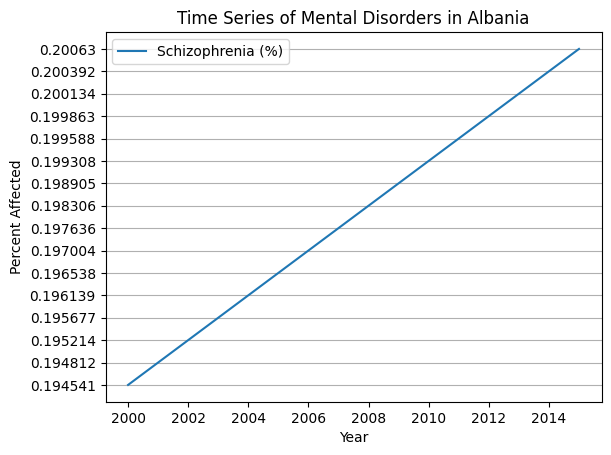

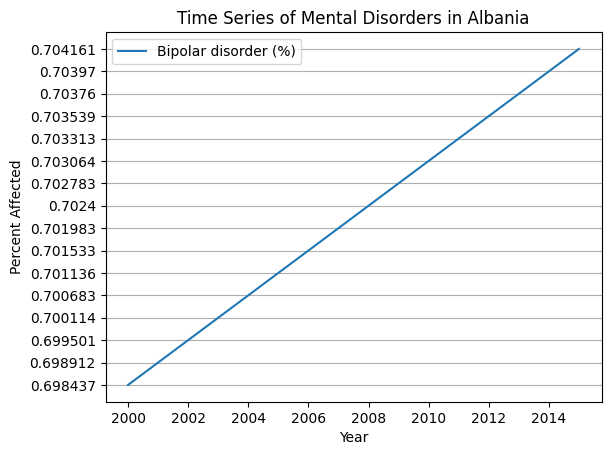

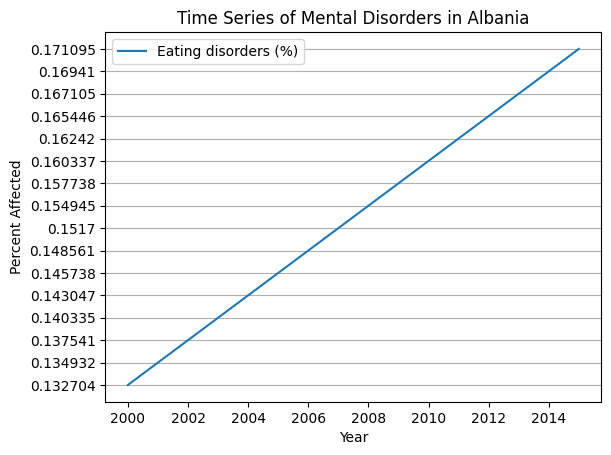

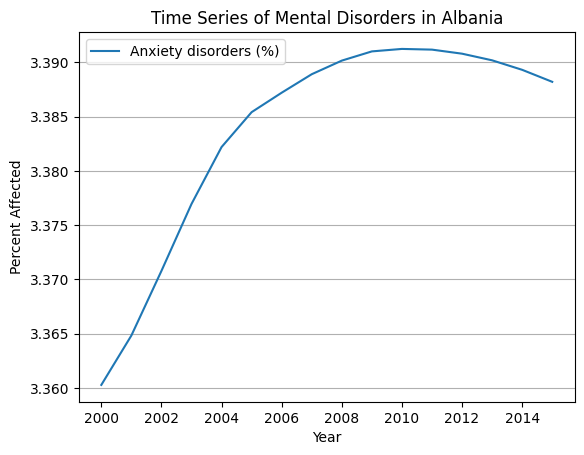

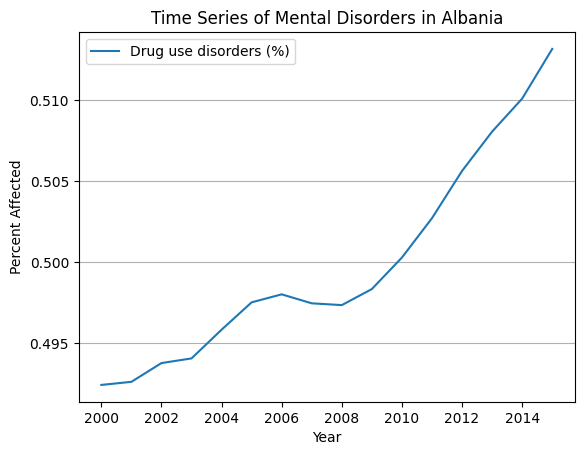

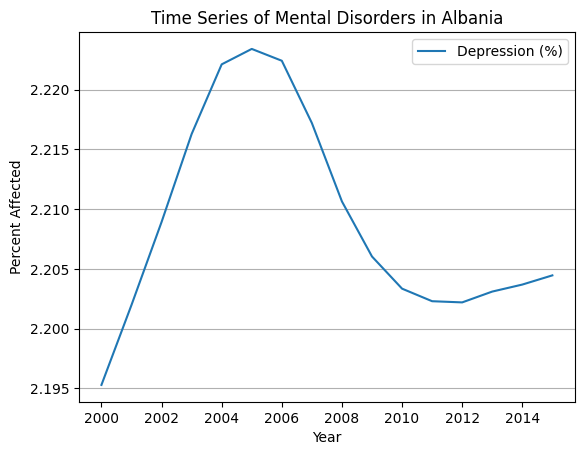

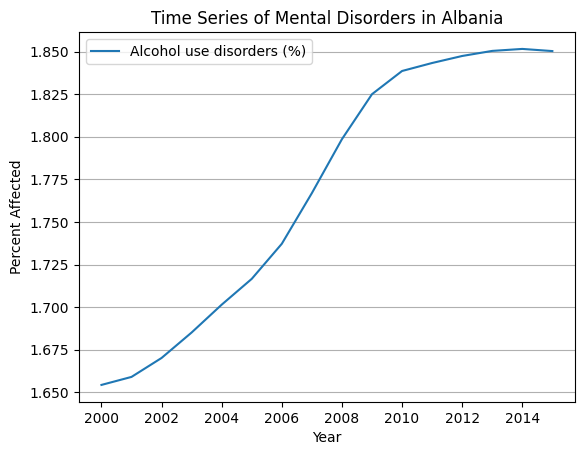

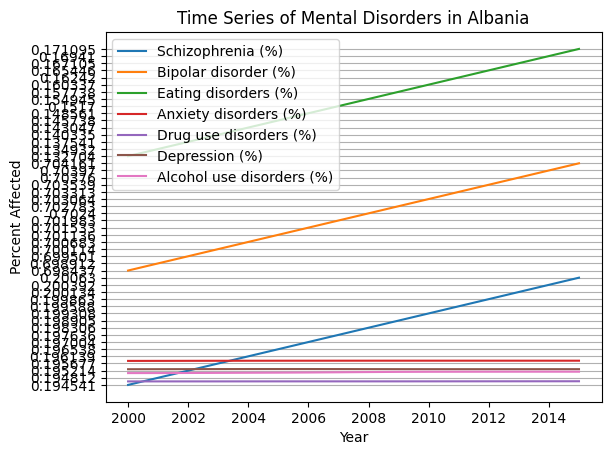

In [88]:
#Time series displaying the change in each mental disorder in Albania from 2000-2015
line_plot(final_df, 'Albania')
#Time series displaying the change in mental disorders in Albania from 2000-2015
line_plot_comb(final_df, 'Albania')

### Heatmap
The correlation heatmap consideres a specific year and compares all countries from our dataset across all possible variables that are considered for our project. From this heatmap, we can observe a correlations amongst multiple variables, including any variables that may behave in a similar fashion. For instance, alcohol use and umemployment rate are negatively correlated with every mental health disorder, and depression is negatively correlated with every variable. Alternatively, there are certain clusters that indicate similar trends, such as bipolar, eating disorder, and anxiety disorders all being positively correlated with each other. Furthermore, we can get a general idea of which variables have low correlation with mental heatlth disorers. For instance, life expectancy and HDI are minimally correlated with drug use, which indicates those variables may not be effective in modeling changes in drug use.  

In [89]:
#Function to create a heatmap based off year selected
def makeHeatmap(df, year):
    heatmap_data = df.iloc[:,1:]
    heatmap_data = heatmap_data[heatmap_data['Year'] == year]
    heatmap_data = heatmap_data.drop('Year', axis = 1)
    correlation_matrix = heatmap_data.corr()
    plt.figure(figsize=(6,4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for Mental Disorders in {year} Across Countries')
    plt.show()

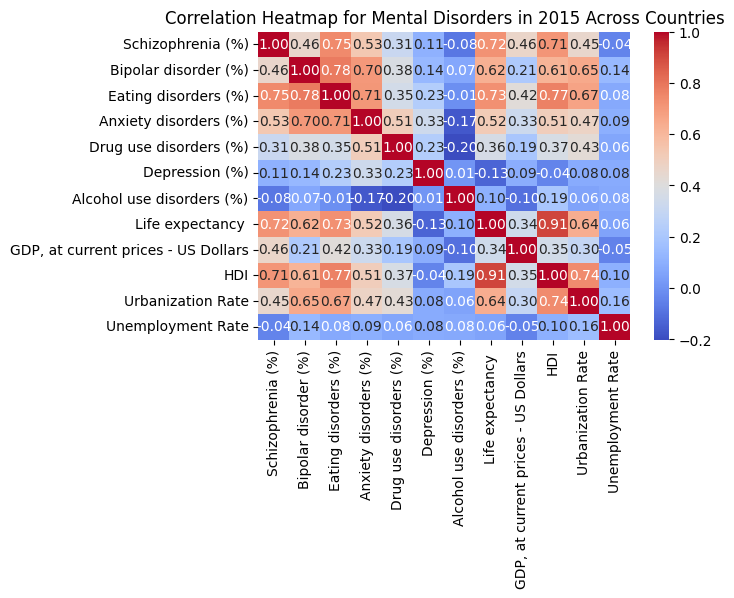

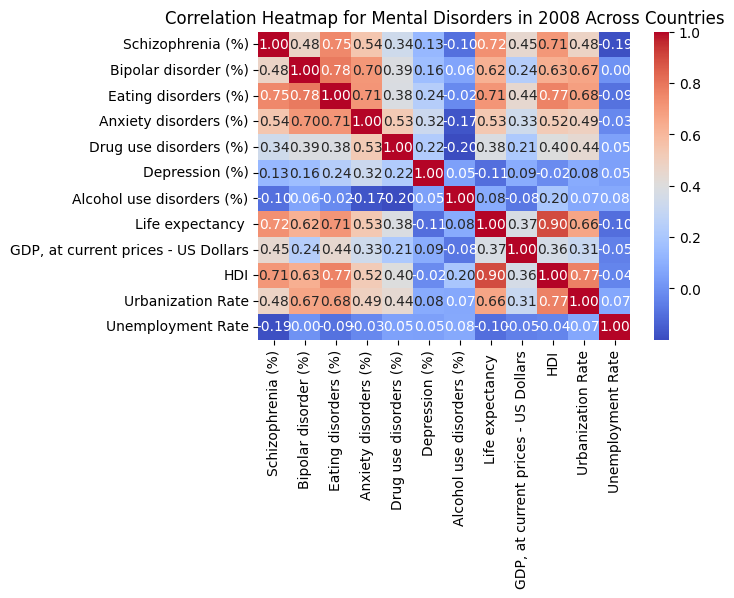

In [90]:
makeHeatmap(final_df, 2015)
makeHeatmap(final_df, 2008)

#### Scatterplot Matrix

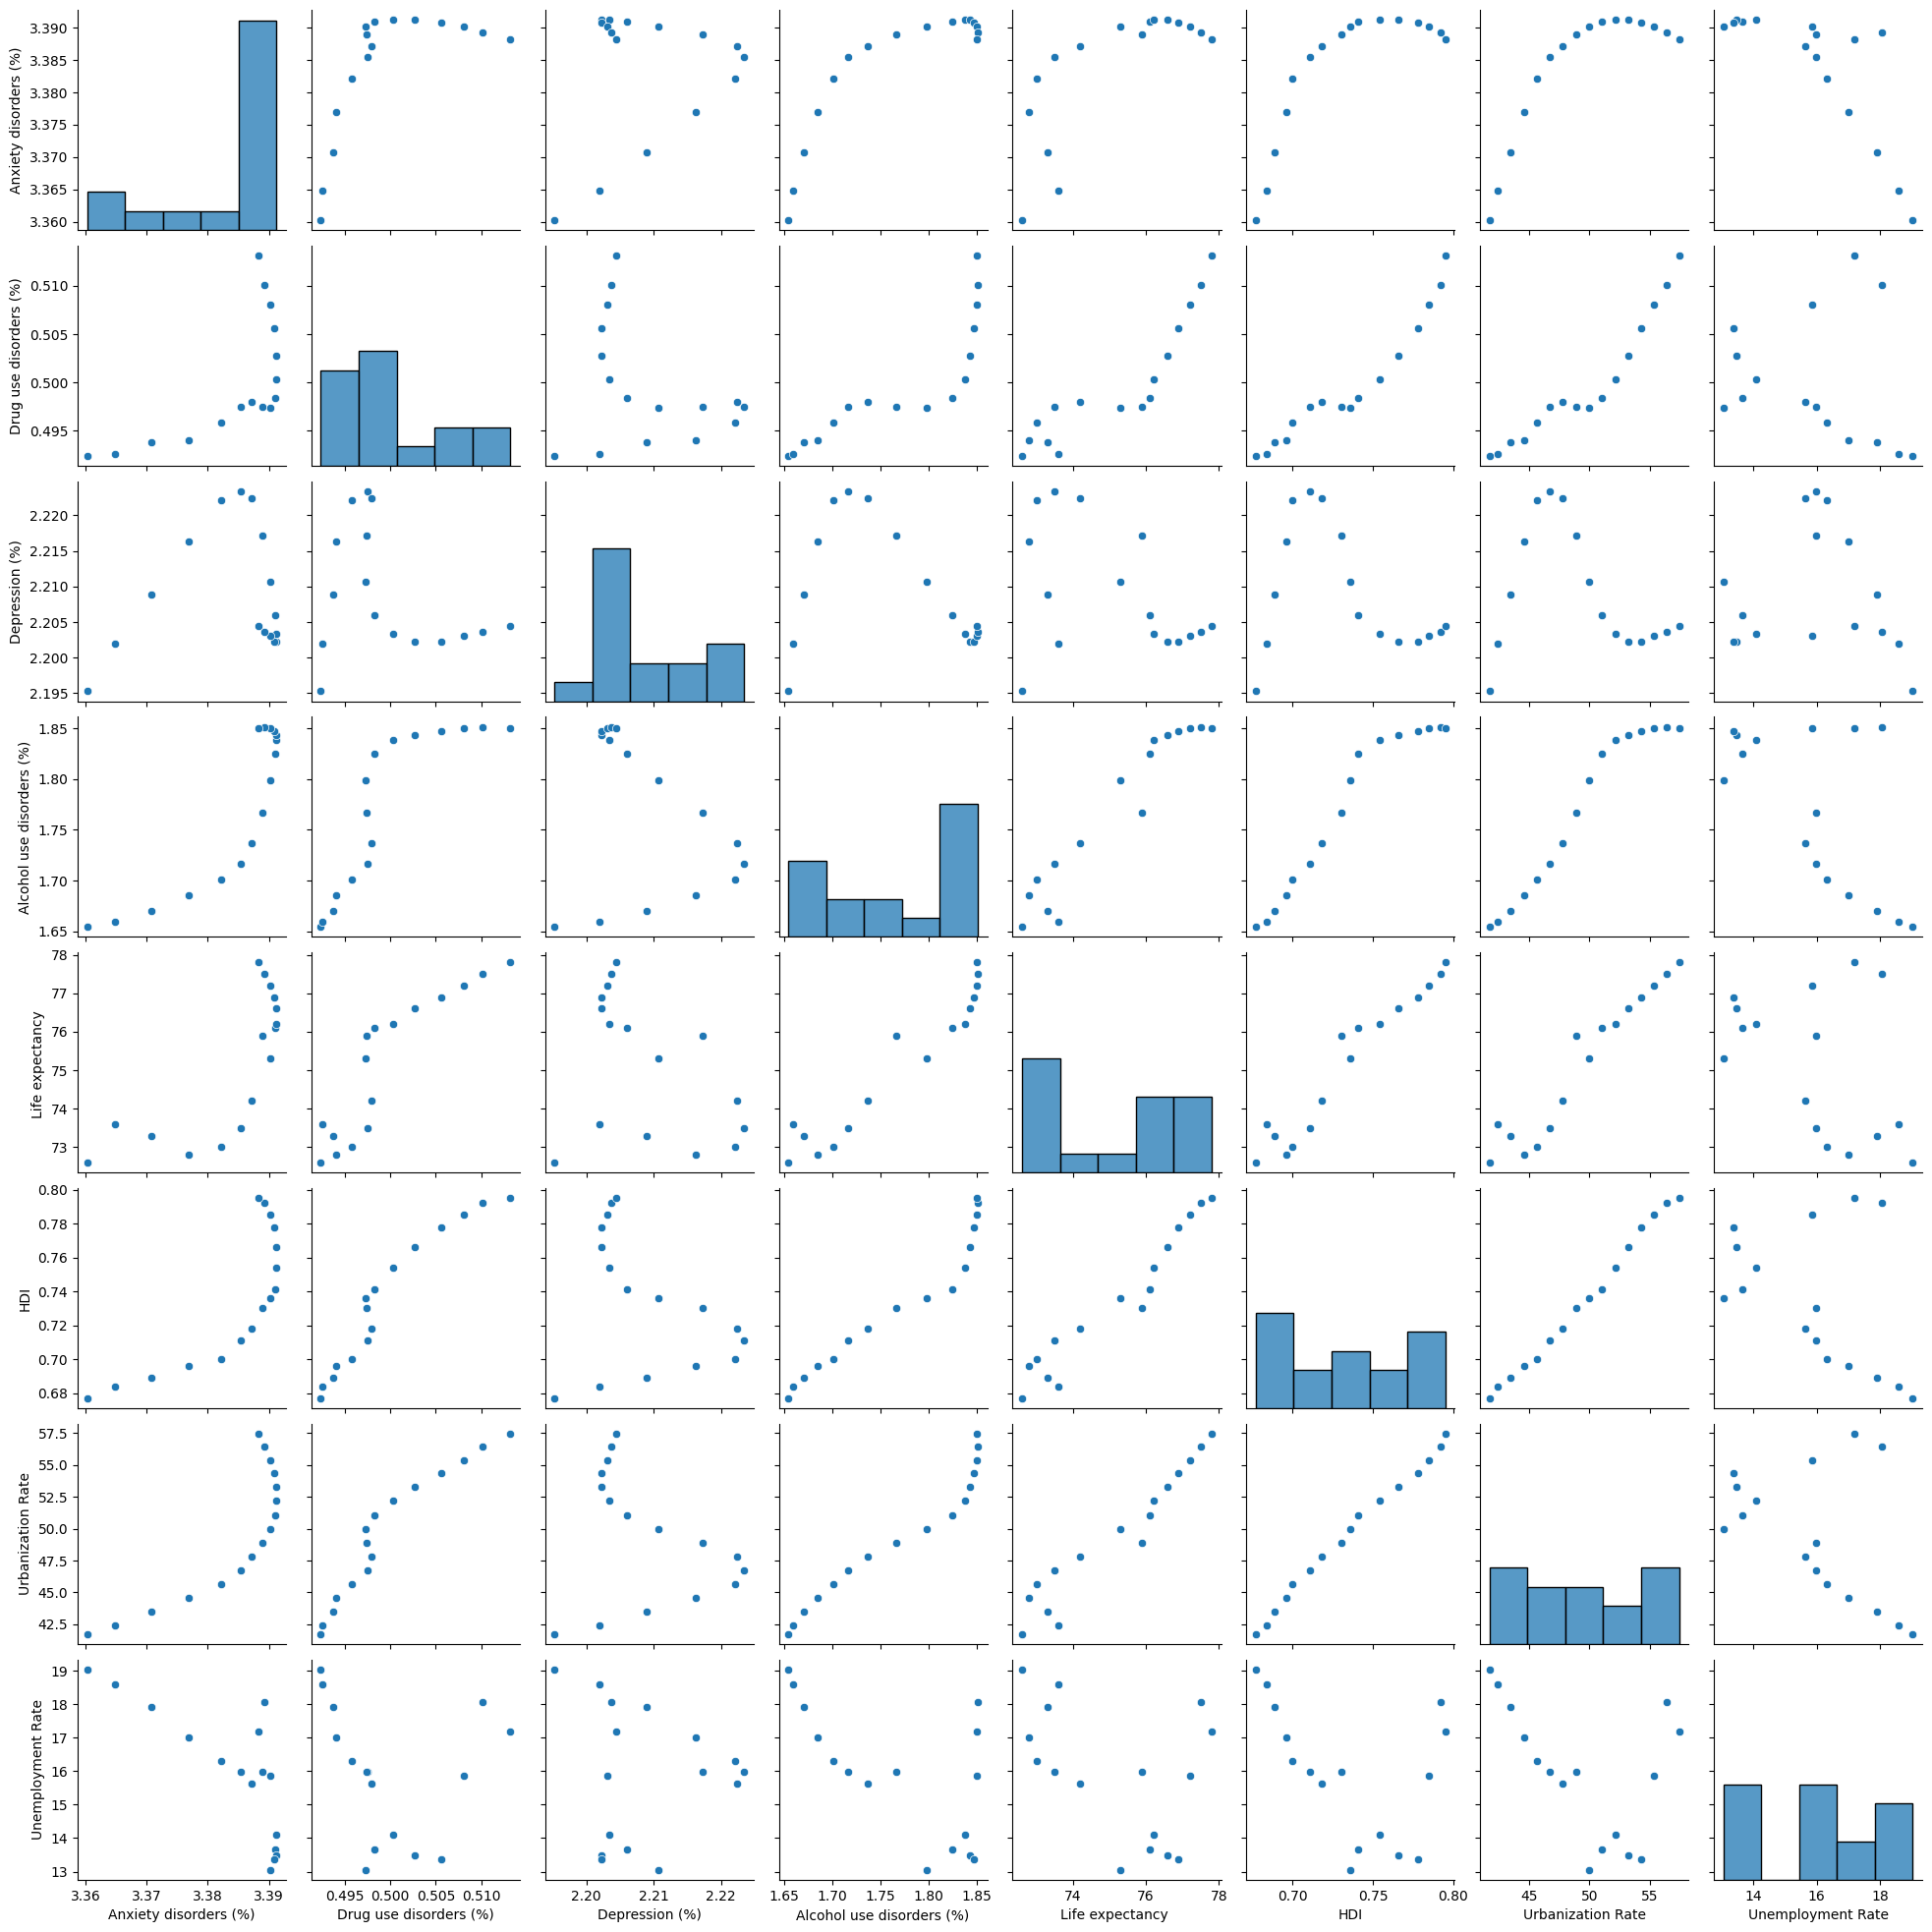

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Life expectancy,"GDP, at current prices - US Dollars",HDI,Urbanization Rate,Unemployment Rate
16,0.194541,0.698437,0.132704,3.360267,0.492401,2.195285,1.654338,72.6,3487586302.02033,0.677,41.741,19.03
17,0.194812,0.698912,0.134932,3.364824,0.492592,2.201979,1.659040,73.6,3926887596.5171785,0.684,42.435,18.58
18,0.195214,0.699501,0.137541,3.370780,0.493751,2.208921,1.670158,73.3,4355865888.71302,0.689,43.501,17.90
19,0.195677,0.700114,0.140335,3.376952,0.494039,2.216283,1.685102,72.8,5561459460.633128,0.696,44.573,16.99
20,0.196139,0.700683,0.143047,3.382199,0.495812,2.222116,1.701433,73.0,7177030364.862026,0.700,45.651,16.31


In [91]:
input_variables = ['Country','Year','Life expectancy ', 'GDP, at current prices - US Dollars', 'HDI', 'Urbanization Rate', 'Unemployment Rate']
scatter_df= final_df[final_df['Year'] == 2015]
scatter_df= final_df[final_df['Country'].str.contains('Albania')]
scatter_df = scatter_df.drop(['Year', 'Country'], axis = 1)
sns.pairplot(scatter_df)
plt.show()
scatter_df.head()


## Data Limitations

**Data bias:**
 
 When we were cleaning the data and dropping NaNs, we realized there is unequal representation because some countries appear more frequently than others leading to a skewed distribution of data. 
This overrepresentation would limit the generalizability and validity of our findings and potentially leads to overlooking less-represented nations.

Additionally, this will affect the rankings and comparisons in our results because our data only represents 135 countries out of the 195 countries in the world excluding less known countries like Vanuatu, Tonga, Togo, Cabo Verde, etc. 

**Repetitiveness:**

Our dataset on life expectancy incorporates both GDP and population data for each year, which has the potential to significantly increase the size of the dataset, posing increased challenges in terms of data management and analysis, particularly when dealing with a sizable dataset.

Additionally, this could lead to redundancy. Given that the identical GDP and population data may be replicated for each corresponding life expectancy record, this has the potential to create inefficiencies in data storage and analytical processes.

**Mental health disorders could overlap:**

The global mental health disorders dataset contains categories that may overlap, since mental health disorders are not mutually exclusive. For instance, people with anxiety can also have depression. 

Mental health disorders may not necessarily exist in isolation, and individuals can simultaneously suffer from multiple disorders. This co-occurrence of mental health conditions presents several constraints that cause limitations when conducting analysis and interpreting results.

The original data we used, obtained from the global trends in mental health disorders dataset, consists of columns that provide details regarding the Entity, Country Code, Year, and various mental health conditions, including Schizophrenia, Bipolar Disorder, Eating Disorders, Anxiety Disorders, Drug Use Disorders, Depression, and Alcohol Use Disorders. However, it's important to note that this dataset doesn't accommodate the presence of that overlap among some of these disorders. As a result, distinguishing the individual influence of each disorder becomes challenging, and it may be problematic to identify whether the observed effects come from a single disorder or interactions among multiple disorders.

**Different countries have different metrics for identifying diseases:**

Different countries may use different standards and measures in the identification and diagnosis of diseases. These disparities can impact our analytical procedures and the way we interpret results, causing disparities in disease identification, which, in turn, can complicate cross-country comparisons and give rise to discrepancies in reported disease prevalence. Additionally, cultural and societal norms can further shape how individuals perceive and report symptoms, thus influencing their inclination to seek medical attention and self-reported data. For example, according to the National Institutes of Health, in the United States of America, an individual must have five depression symptoms every day, nearly all day, for at least 2 weeks while according to the National Library of Medicine, Kenyans diagnose depression with tobacco use and engagement in binge drinking.  


**Data Availability:**


In our initial raw data, not all years seamlessly align or fit perfectly with other datasets. As a result, we found it essential to refine the scope of our analysis and narrow the years down. For instance, the unemployment analysis dataset covers the years 1991 to 2021, while other datasets, such as the life expectancy dataset, has the years 2000 to 2015. This led us to concentrate on distinct years characterized by complete and dependable data.

The HDI dataset was from Human Development Reports by the United Nations Development Programme and this dataset was created for the purpose of providing high quality international statistics that are free and accessible for all. There is no reason to question the trustworthiness of this dataset because it is an international organization that would not have personal interests to fulfill if the data results were biased.

Hanna Yukhymenko created the Urbanization dataset with the purpose of answering the question of how the percentage of urban population has developed in different continents as well as finding out what the most urban country is through analyzing both percentage and total urban population. She got this information from The World Bank organization. Even though this information is from a trustworthy organization, Hanna Yukhymenko is from Switzerland and may have been biased when creating this dataset especially because it is comparing countries.

Anjali Pant, an Engineering student from India created the unemployment dataset with the purpose of analyzing why unemployment occurs. Anjali’s country, India, has a relatively stable unemployment rate across most years hence leading us to believe that this dataset could be trustworthy. Additionally, Anjali got this data from The World Bank Organization which is also an internationally recognized organization.

Kumarra Jarshi created the Life expectancy dataset for the purpose of putting into account the immunization and human development rates in relation to life expectancy considering demographic variables, income composition and mortality rates by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. We have no reason to question the trustworthiness of this dataset because it cited the World Health Organization (WHO) as the source of the accurate data. WHO uses standardized metrics to collect data.